In [0]:
import torch
import matplotlib.pyplot as plt
import tqdm
import utils
import dataloaders
import torchvision
from trainer import Trainer

### Model Definition

In [0]:
torch.random.manual_seed(0)

class FullyConnectedModelA(torch.nn.Module):

    def __init__(self):
        super().__init__()
        # We are using 28x28 greyscale images.
        num_input_nodes = 28*28
        # Number of classes in the MNIST dataset
        num_classes = 10

        # Define our model
        self.classifier = torch.nn.Sequential(
            torch.nn.Linear(num_input_nodes, num_classes),
        )
    
    def forward(self, x):
        # Runs a forward pass on the images
        x = x.view(-1, 28*28)
        out = self.classifier(x)
        return out

class FullyConnectedModelD(torch.nn.Module):

    def __init__(self):
        super().__init__()
        # We are using 28x28 greyscale images.
        num_input_nodes = 28*28
        # Number of classes in the MNIST dataset
        num_classes = 10
        num_hidden_nodes = 64

        # Define our model
        self.classifier = torch.nn.Sequential(
            
            torch.nn.Linear(num_input_nodes, num_hidden_nodes),
            torch.nn.ReLU(True),
            torch.nn.Linear(num_hidden_nodes, num_classes),
        )
    
    def forward(self, x):
        # Runs a forward pass on the images
        x = x.view(-1, 28*28)
        out = self.classifier(x)
        return out


### Hyperparameters & Loss function

In [24]:
# Hyperparameters
batch_size = 64
learning_rate = .0192
num_epochs = 5


# Use CrossEntropyLoss for multi-class classification
loss_function = torch.nn.CrossEntropyLoss()

# Model definition
model = FullyConnectedModelA()

# Define optimizer (Stochastic Gradient Descent)
optimizer = torch.optim.SGD(model.parameters(),
                            lr=learning_rate)
image_transform = torchvision.transforms.Compose([
  torchvision.transforms.ToTensor() , torchvision.transforms.Normalize((0.5,), (0.25,)),
])
dataloader_train, dataloader_val = dataloaders.load_dataset(batch_size, image_transform=image_transform)

trainer = Trainer(
  model=model,
  dataloader_train=dataloader_train,
  dataloader_val=dataloader_val,
  batch_size=batch_size,
  loss_function=loss_function,
  optimizer=optimizer
)
train_loss_a_dict, val_loss_a_dict = trainer.train(num_epochs)


Training epoch 4: 100%|██████████| 938/938 [00:09<00:00, 98.19it/s]

In [25]:
# Model definition
model = FullyConnectedModelD()

# Define optimizer (Stochastic Gradient Descent)
optimizer = torch.optim.SGD(model.parameters(),
                            lr=learning_rate)
image_transform = torchvision.transforms.Compose([
  torchvision.transforms.ToTensor() , torchvision.transforms.Normalize((0.5,), (0.25,)),
])
dataloader_train, dataloader_val = dataloaders.load_dataset(batch_size, image_transform=image_transform)

trainer = Trainer(
  model=model,
  dataloader_train=dataloader_train,
  dataloader_val=dataloader_val,
  batch_size=batch_size,
  loss_function=loss_function,
  optimizer=optimizer
)
train_loss_d_dict, val_loss_d_dict = trainer.train(num_epochs)


Training epoch 4: 100%|██████████| 938/938 [00:10<00:00, 92.97it/s]

### Train model

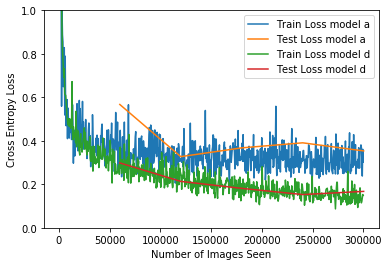

Final Test Cross Entropy Loss: 0.16745468176260686. Final Test accuracy: 0.9484


In [26]:

# Plot loss
utils.plot_loss(train_loss_a_dict, label="Train Loss model a")
utils.plot_loss(val_loss_a_dict, label="Test Loss model a")
utils.plot_loss(train_loss_d_dict, label="Train Loss model d")
utils.plot_loss(val_loss_d_dict, label="Test Loss model d")
plt.ylim([0, 1])
plt.legend()
plt.xlabel("Number of Images Seen")
plt.ylabel("Cross Entropy Loss")
plt.savefig("training_loss_ad.png")

plt.show()
torch.save(model.state_dict(), "saved_model.torch")
final_loss, final_acc = utils.compute_loss_and_accuracy(
    dataloader_val, model, loss_function)
print(f"Final Test Cross Entropy Loss: {final_loss}. Final Test accuracy: {final_acc}")

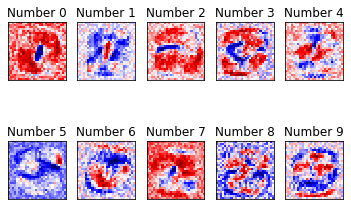

In [0]:
weight = next(model.classifier.children()).weight.data
for num in range(10):
    plt.subplot(2, 5, num+1)
    image = weight[num].reshape([28,28])
    plt.title(f'Number {num}')
    plt.imshow(image, cmap=plt.get_cmap('seismic'))
    frame1 = plt.gca()
    frame1.axes.get_xaxis().set_visible(False)
    frame1.axes.get_yaxis().set_visible(False)
plt.show()